In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
## Reading the dataframe
dataframe  = pd.read_csv("pima-indians-diabetes.csv" , header = None)
dataframe.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Column information of dataframe

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [19]:
dataframe[8].value_counts()

0    500
1    268
Name: 8, dtype: int64

In [39]:
# dividing into features and prediction variable
X = dataframe.iloc[:,:-1]
print(X.head())
Y = dataframe.iloc[: , -1]
print("Y\n" , Y.head(5))

   0    1   2   3    4     5      6   7
0  6  148  72  35    0  33.6  0.627  50
1  1   85  66  29    0  26.6  0.351  31
2  8  183  64   0    0  23.3  0.672  32
3  1   89  66  23   94  28.1  0.167  21
4  0  137  40  35  168  43.1  2.288  33
Y
 0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64


In [46]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1+math.exp(-x))

#Predict y based on new features
def predict(features,betas):
    yp = np.dot(betas, np.append(features, 1))
    return sigmoid(yp)

## Stochastic Gradient descent formula:
 weights <- weights - learningrate(predict(xi) - Actual(xi))*Xi

In [135]:
def update_weights(betas,x,yactual,lr):
    ypredicted = predict(x,betas)
    betas -= lr * (ypredicted-yactual) * np.append(x,1)
    
def train_sgd(X,y,lr,epochs, X_test, Y_test):
    accuracy_per_epoch = []
    betas = np.zeros(X.shape[1] + 1)
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            update_weights(betas, X[i,:], y[i], lr)
        accuracy_per_epoch.append(Calculate_accuracy(betas, X_test, Y_test))
    return betas, accuracy_per_epoch

In [136]:
def Calculate_accuracy(betas,X_test, Y_test):
    test_predictions = [round(predict(x,betas)) for x in X_test]
    test_predictions
    total_samples = len(Y_test)
    accuracy = sum([test_predictions[i]==Y_test[i] for i in range(total_samples)])/total_samples
    return accuracy

In [137]:
def main():
    #Convert to Numpy arrays
    Xa = X.to_numpy()
    Ya = Y.to_numpy()
    #Train Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(Xa, Ya, test_size=0.25, random_state=111)
    
    #normalize all features to 0 and 1 values
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    #Learning Rate and Number of Epochs
    lr = 0.001
    epochs = 100
    
    #Normalize test set too
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    accuracy_per_epoch = []
    #Train
    betas , accuracy_per_epoch = train_sgd(X_train,Y_train,lr,epochs,X_test,Y_test)
    #Plot accuracy vs Epoch
    import matplotlib.pyplot as plt
    plt.plot(range(len(accuracy_per_epoch)), accuracy_per_epoch)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    #Get accuracy on test data
    print("Accuracy with Stochastic Gradient Descent =",accuracy_per_epoch[-1])

Accuracy with Stochastic Gradient Descent = 0.7239583333333334


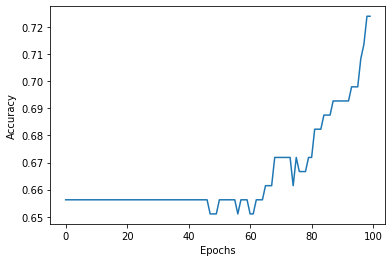

In [138]:
if __name__ == '__main__':
    main()

### Lets plot accuracy vs Epoch

## The Baseline for this dataset is 65%, with SGD we are succesful in obtaining 72% Accuracy